In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from keras.preprocessing.image import ImageDataGenerator
#supress warnings
from keras.layers import Input, Lambda, Dense, Flatten

import warnings
warnings.filterwarnings("ignore")


In [14]:
import os

#directories = [r'C:\Users\User\Desktop\NABIRDSTFG\test',
                                #r'C:\Users\User\Desktop\NABIRDSTFG\train',
                                #r'C:\Users\User\Desktop\NABIRDSTFG\val']
directories = [r'C:\Users\User\Desktop\AVES\test',
                                r'C:\Users\User\Desktop\AVES\train',
                                r'C:\Users\User\Desktop\AVES\val']

for dir in directories:
    label = []
    path = []
    for dirname, _,filenames in os.walk(dir):
        for filename in filenames:
            label.append(os.path.split(dirname)[1])
            path.append(os.path.join(dirname,filename))
    if dir == directories[0]:
        df_test = pd.DataFrame(columns=['path','label'])
        df_test['path']=path
        df_test['label']=label
    elif dir == directories[1]:
        df_train = pd.DataFrame(columns=['path','label'])
        df_train['path']=path
        df_train['label']=label        
    elif dir == directories[2]:
        df_valid = pd.DataFrame(columns=['path','label'])
        df_valid['path']=path
        df_valid['label']=label

In [15]:
image_size = (224,224)
image_shape=(224,224,3)

Found 9340 validated image filenames belonging to 24 classes.
Found 144 validated image filenames belonging to 24 classes.
Found 96 validated image filenames belonging to 24 classes.


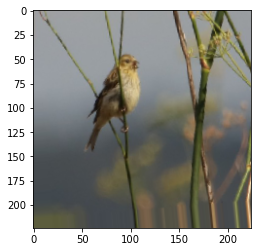

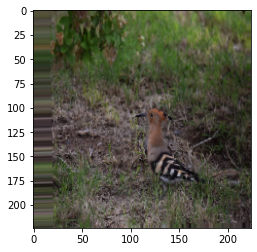

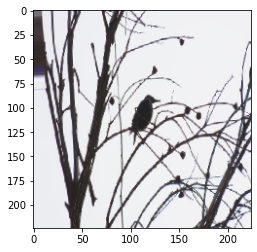

In [16]:
BS = 32

train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=10,
                                   width_shift_range=0.1,
                                   height_shift_range=0.1,
                                   shear_range=0.1,
                                   zoom_range=0.1,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

valid_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_dataframe(
    dataframe = df_train, x_col='path', y_col='label',
    target_size= image_size,
    batch_size=BS,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True)

valid_generator = valid_datagen.flow_from_dataframe(
    dataframe = df_valid, x_col='path', y_col='label',
    target_size= image_size,
    batch_size=BS,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True)

test_generator = valid_datagen.flow_from_dataframe(
    dataframe = df_test, x_col='path', y_col='label',
    target_size= image_size,
    batch_size=BS,
    class_mode='categorical',
    color_mode='rgb',
    shuffle=True)

for _ in range(3):
    img, label = train_generator.next()
    plt.imshow(img[0])
    plt.show()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inception_resnet_v2 (Functi  (None, 5, 5, 1536)       54336736  
 onal)                                                           
                                                                 
 flatten (Flatten)           (None, 38400)             0         
                                                                 
 dense (Dense)               (None, 1950)              74881950  
                                                                 
 batch_normalization_203 (Ba  (None, 1950)             7800      
 tchNormalization)                                               
                                                                 
 dense_1 (Dense)             (None, 24)                46824     
                                                                 
Total params: 129,273,310
Trainable params: 74,932,674
N

Text(0.5, 1.0, 'Loss')

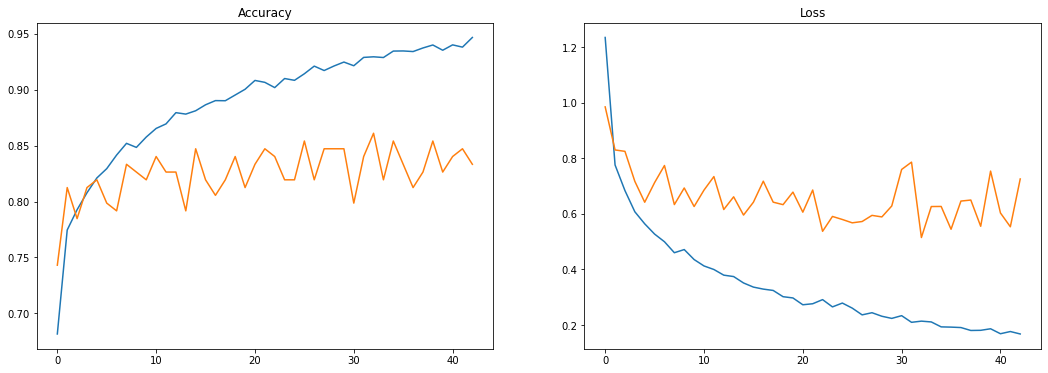

In [5]:
#model

resnet_model=tf.keras.applications.InceptionResNetV2(input_shape=image_shape,
                                               include_top=False,
                                               weights='imagenet')
resnet_model.trainable = False


model = keras.Sequential([  
    resnet_model,
    layers.Flatten(),
    layers.Dense(units=1950,activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(units=24, activation="softmax"),
])
model.summary()

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

#fit

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=10)

history = model.fit(
    train_generator,
    validation_data=valid_generator,
    epochs=100,
    verbose=1,
    callbacks=[early_stop]
)

result=pd.DataFrame(history.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")

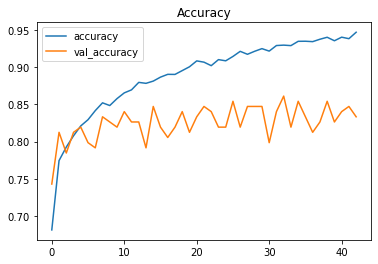

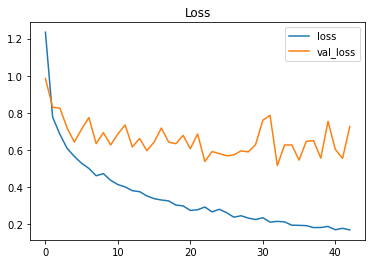

In [8]:
pd.DataFrame(history.history)[['accuracy','val_accuracy']].plot()
plt.title("Accuracy")
plt.show()
pd.DataFrame(history.history)[['loss','val_loss']].plot()
plt.title("Loss")
plt.show()

In [17]:
model.evaluate(test_generator)

3/3 [==============================] - 4s 1s/step - loss: 0.1356 - accuracy: 0.9583


[0.13564935326576233, 0.9583333134651184]

In [24]:
model.save("inceptionlarga.h5")

In [26]:
from keras.models import load_model
from keras.preprocessing.image import load_img, img_to_array


loaded_model = load_model('inceptionlarga.h5', compile = False)

In [34]:
#l= r'C:\Users\User\Desktop\prueba_julio\SETS3\test'
#len(l.class_names)
#labels_names = l.class_names
labels = train_generator.class_indices
labels

{'ABUBILLA COMUN': 0,
 'ALCAVARAN COMUN': 1,
 'ANDARRIOS GRANDE': 2,
 'ARCHIBEBE COMUN': 3,
 'AVOCETA COMUN': 4,
 'CARBONERO COMUN': 5,
 'CHARRAN COMUN': 6,
 'ESTORNINO PINTO': 7,
 'FLAMENCO COMUN': 8,
 'FOCHA COMUN': 9,
 'GARCILLA BUEYERA': 10,
 'GAVIOTA AUDOUIN': 11,
 'GOLONDRINA COMUN': 12,
 'GORRION COMUN': 13,
 'JILGUERO EUROPEO': 14,
 'LAVANDERA BLANCA': 15,
 'MIRLO COMUN': 16,
 'PALOMA TORCAZ': 17,
 'PATO CUCHARA COMUN': 18,
 'PERDIZ ROJA': 19,
 'PITO IBERICO': 20,
 'TARRO BLANCO': 21,
 'TORTOLA TURCA': 22,
 'VERDECILLO': 23}

In [35]:
labels_reverse = {k:v for v,k in labels.items()}
labels_reverse

{0: 'ABUBILLA COMUN',
 1: 'ALCAVARAN COMUN',
 2: 'ANDARRIOS GRANDE',
 3: 'ARCHIBEBE COMUN',
 4: 'AVOCETA COMUN',
 5: 'CARBONERO COMUN',
 6: 'CHARRAN COMUN',
 7: 'ESTORNINO PINTO',
 8: 'FLAMENCO COMUN',
 9: 'FOCHA COMUN',
 10: 'GARCILLA BUEYERA',
 11: 'GAVIOTA AUDOUIN',
 12: 'GOLONDRINA COMUN',
 13: 'GORRION COMUN',
 14: 'JILGUERO EUROPEO',
 15: 'LAVANDERA BLANCA',
 16: 'MIRLO COMUN',
 17: 'PALOMA TORCAZ',
 18: 'PATO CUCHARA COMUN',
 19: 'PERDIZ ROJA',
 20: 'PITO IBERICO',
 21: 'TARRO BLANCO',
 22: 'TORTOLA TURCA',
 23: 'VERDECILLO'}

In [36]:
def output(location):
    img = load_img(location, target_size = (224, 224, 3))
    img = img_to_array(img)
    img = img / 255
    img = np.expand_dims(img, [0])
    answer = loaded_model.predict(img)
    y_class = answer.argmax(axis = -1)
    y = " ".join(str(x) for x in y_class)
    y = int(y)
    res = labels_reverse[y]
    return res

'GARCILLA BUEYERA'

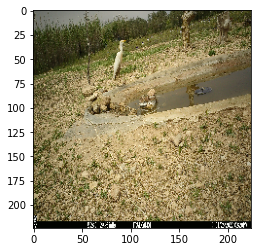

In [37]:

img = r'C:\Users\User\Downloads\tortrevieja/IMG_9548.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'TORTOLA TURCA'

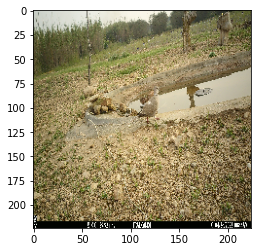

In [38]:

img = r'C:\Users\User\Downloads\tortrevieja/IMG_9162.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'MIRLO COMUN'

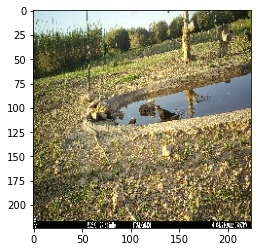

In [39]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_5511.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'VERDECILLO'

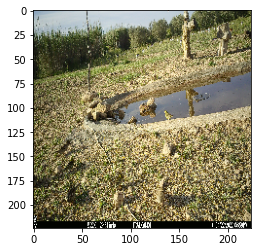

In [40]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_5804.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'TORTOLA TURCA'

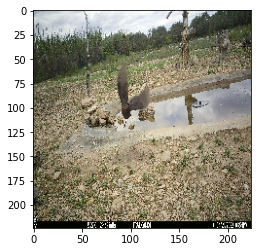

In [41]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_5375.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'GARCILLA BUEYERA'

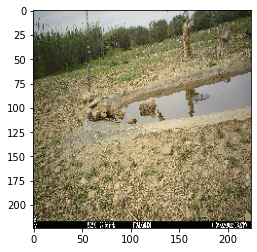

In [43]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_5783.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'MIRLO COMUN'

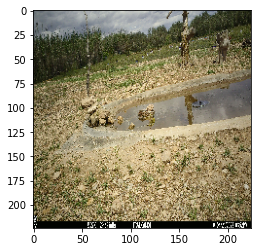

In [44]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_5372.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'VERDECILLO'

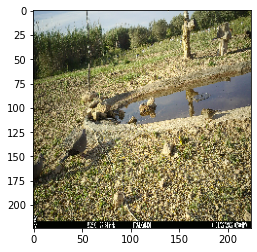

In [45]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_5818.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'VERDECILLO'

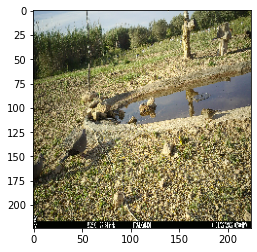

In [46]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_5818.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

pilla la del centro

'TORTOLA TURCA'

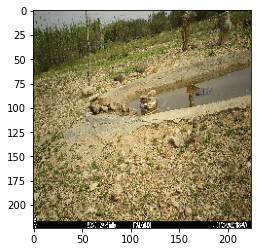

In [47]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_9245.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

est en el fondo pero en el centro

'TORTOLA TURCA'

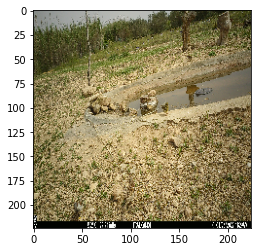

In [48]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_9218.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'GORRION COMUN'

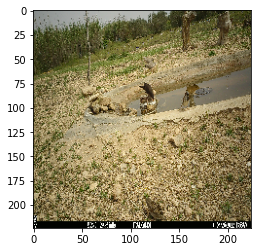

In [50]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_9268.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)

'GARCILLA BUEYERA'

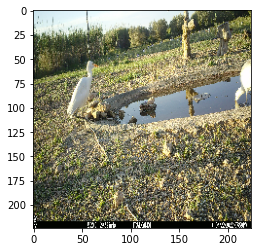

In [52]:
img = r'C:\Users\User\Downloads\tortrevieja/IMG_5870.JPG'
pic =load_img(img, target_size = (224, 224, 3))
plt.imshow(pic)
output(img)